# TASK 1

## Installing the DASK library

In [1]:
pip install dask-labextension

Note: you may need to restart the kernel to use updated packages.


In [2]:
from dask.distributed import Client
client = Client(processes= False, threads_per_worker= 2, memory_limit='4GB')
client

C:\Users\User\anaconda3\Lib\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 59796 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://192.168.0.107:59796/status,
Dashboard: http://192.168.0.107:59796/status,Workers: 1
Total threads: 2,Total memory: 3.73 GiB
Status: running,Using processes: False
Comm: inproc://192.168.0.107/7648/1,Workers: 1
Dashboard: http://192.168.0.107:59796/status,Total threads: 2
Started: Just now,Total memory: 3.73 GiB
Comm: inproc://192.168.0.107/7648/4,Total threads: 2
Dashboard: http://192.168.0.107:59797/status,Memory: 3.73 GiB
Nanny: None,


## Importing the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd

## Importing the csv file

In [4]:
df = dd.read_csv('C:/Users/User/OneDrive/Desktop/INTERNSHIP/Projects/Task 1/BigBasket_Products.csv', assume_missing=True)

In [5]:
df

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
npartitions=1,,,,,,,,,,
,float64,string,string,string,string,float64,float64,string,float64,string
,...,...,...,...,...,...,...,...,...,...


## Exploratory Data Anlysis

In [6]:
df.describe()

,index,sale_price,market_price,rating
npartitions=1,,,,
,float64,float64,float64,float64
,...,...,...,...


In [7]:
df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 10 entries, index to description
dtypes: float64(4), string(6)

In [8]:
df= df.drop('description', axis=1)

In [9]:
df.isnull().sum()
# to check for any null values in the dataset

Dask Series Structure:
npartitions=1
brand    int64
type       ...
dtype: int64
Dask Name: to_pyarrow_string, 7 graph layers

In [10]:
df = df.dropna()
# to drop columns with missing values

In [11]:
df['index'] = dd.to_numeric(df['index'], errors='coerce').fillna(0).astype(int)
df['sale_price'] = dd.to_numeric(df['sale_price'], errors='coerce').fillna(0).astype(int)
df['market_price'] = dd.to_numeric(df['market_price'], errors='coerce').fillna(0).astype(int)
df['rating'] = dd.to_numeric(df['rating'], errors='coerce').fillna(0).astype(int)

# to convert the datatype of columns into integer from float

In [12]:
df

,index,product,category,sub_category,brand,sale_price,market_price,type,rating
npartitions=1,,,,,,,,,
,int32,string,string,string,string,int32,int32,string,int32
,...,...,...,...,...,...,...,...,...


In [13]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220,220,Hair Oil & Serum,4
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180,180,Water & Fridge Bottles,2
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119,250,Lamp & Lamp Oil,3
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149,176,"Laundry, Storage Baskets",3
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162,162,Bathing Bars & Soaps,4


In [14]:
df.shape

(Delayed('int-e5087619-a95a-4f4e-853d-3e8d19b48d1f'), 9)

## Extracted Insights

### 1. CATEGORY

In [15]:
max_ratings = df.groupby('category')['rating'].max()
# Grouped by category for maximum no. of ratings received

In [16]:
max_ratings.compute()

category
Baby Care                   5
Bakery, Cakes & Dairy       5
Beauty & Hygiene            5
Beverages                   5
Cleaning & Household        5
Foodgrains, Oil & Masala    5
Gourmet & World Food        5
Kitchen, Garden & Pets      5
Snacks & Branded Foods      5
Name: rating, dtype: int32

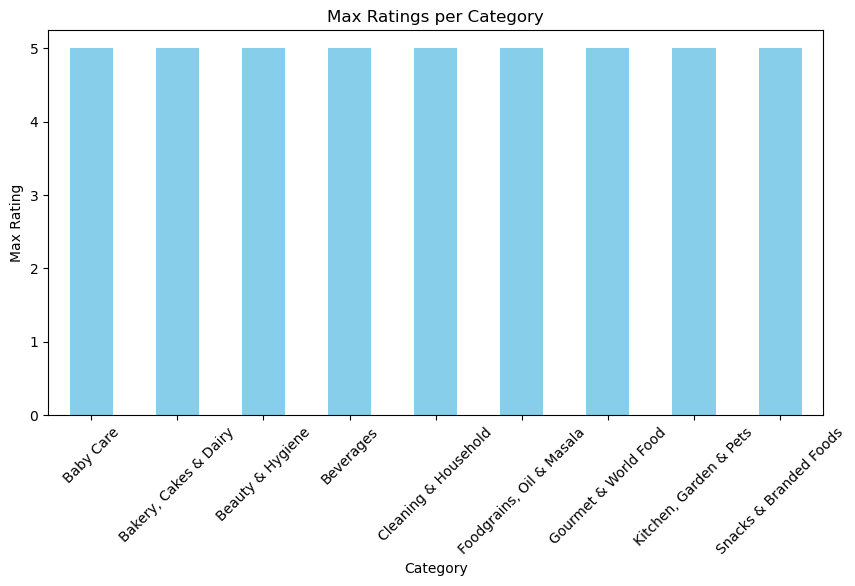

In [17]:
max_ratings = pd.Series(max_ratings.compute())  # Convert to Series

max_ratings.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.xlabel("Category")
plt.ylabel("Max Rating")
plt.title("Max Ratings per Category")
plt.xticks(rotation=45)
plt.show()

In [18]:
total_ratings = df.groupby('category')['rating'].sum()
# Grouped by category for highest ratings received

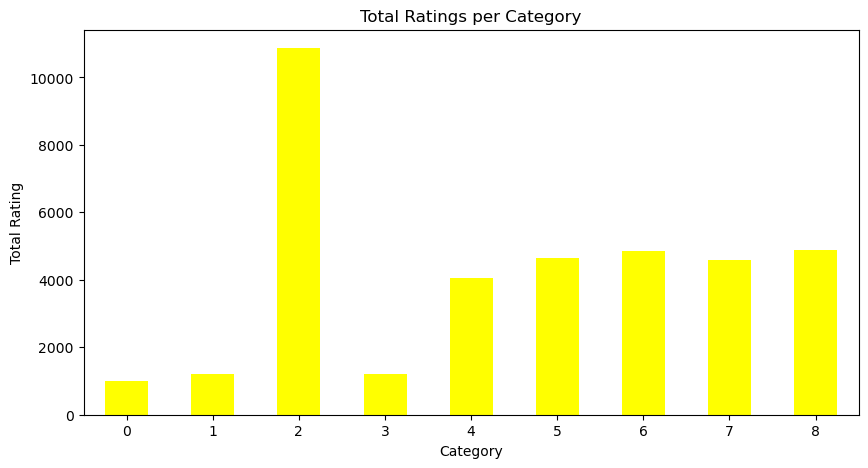

In [19]:
total_ratings = pd.Series(total_ratings)  # Convert to Series

total_ratings.plot(kind='bar', figsize=(10, 5), color='yellow')
plt.xlabel("Category")
plt.ylabel("Total Rating")
plt.title("Total Ratings per Category")
plt.xticks(rotation=0)
plt.show()

### 2. SUB CATEGORY

In [20]:
max_rating1 = df.groupby('sub_category')['rating'].max()
# Grouped by sub category for maximum no. of ratings received

In [21]:
max_rating1.compute()

sub_category
All Purpose Cleaners        5
Appliances & Electricals    4
Atta, Flours & Sooji        4
Baby Accessories            5
Baby Bath & Hygiene         5
                           ..
Steel Utensils              5
Storage & Accessories       5
Tea                         5
Tinned & Processed Food     5
Water                       4
Name: rating, Length: 77, dtype: int32

In [22]:
top_rating = max_rating1.compute().value_counts()

In [23]:
top_rating

rating
5    60
4    17
Name: count, dtype: int64

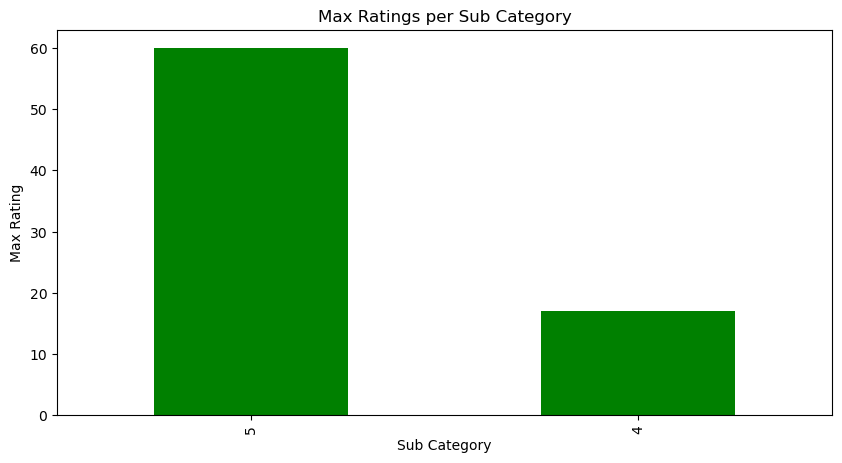

In [24]:
max_rating1 = pd.Series(max_rating1)  # Convert to Series

top_rating.plot(kind='bar', figsize=(10, 5), color='green')
plt.xlabel("Sub Category")
plt.ylabel("Max Rating")
plt.title("Max Ratings per Sub Category")
plt.xticks(rotation=90)
plt.show()

In [25]:
total_rating1 = df.groupby('sub_category')['rating'].sum()
# Grouped by sub category for highest ratings received

In [26]:
top_ratings = total_rating1.compute().nlargest(10)

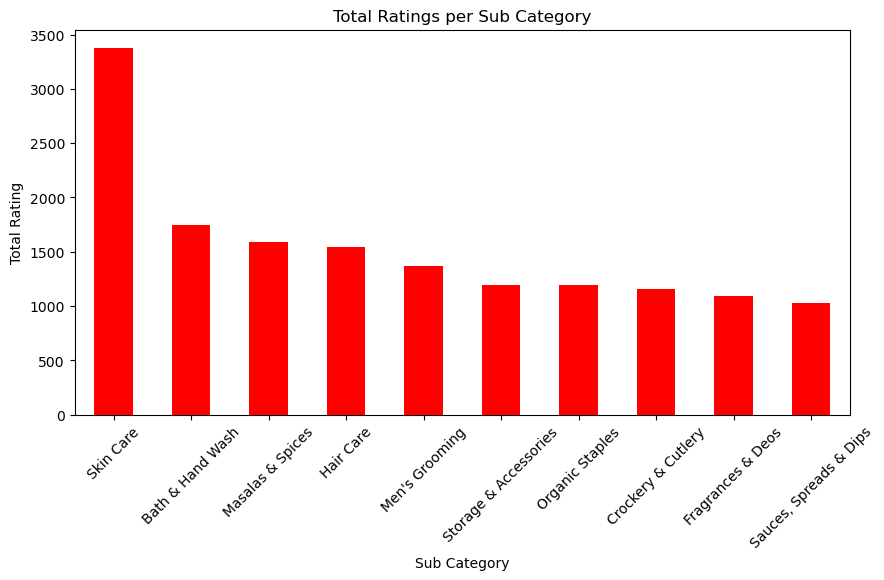

In [27]:
total_rating1 = pd.Series(total_rating1)  # Convert to Series

top_ratings.plot(kind='bar', figsize=(10, 5), color='red')
plt.xlabel("Sub Category")
plt.ylabel("Total Rating")
plt.title("Total Ratings per Sub Category")
plt.xticks(rotation=45)
plt.show()

### 3. TOTAL LOSS

In [28]:
def subtract_columns(df,market_price,sale_price,Loss_incured):
    df['loss_incured'] = df['market_price'] - df['sale_price']
    return df
# defined a function to calculate the total loss incurred

In [29]:
df = subtract_columns(df, "market_price", "sale_price", "loss_incured")

In [30]:
df.compute().head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,loss_incured
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220,220,Hair Oil & Serum,4,0
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180,180,Water & Fridge Bottles,2,0
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119,250,Lamp & Lamp Oil,3,131
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149,176,"Laundry, Storage Baskets",3,27
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162,162,Bathing Bars & Soaps,4,0


### 4. BRANDS

In [31]:
total_sales_of_brand = df.groupby('brand')['sale_price'].sum()
# Grouped by brand for total sales

In [32]:
top_brands = total_sales_of_brand.compute().nlargest(10)

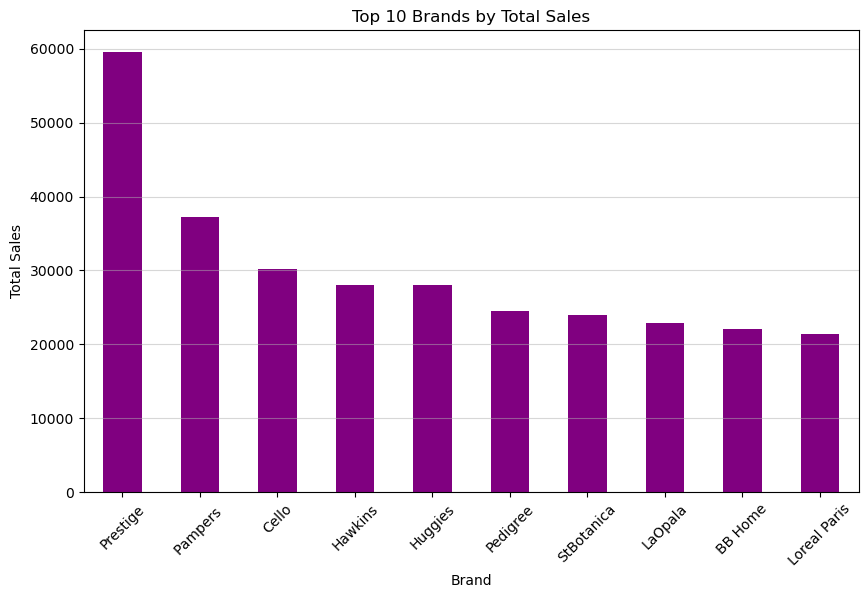

In [33]:
plt.figure(figsize=(10, 6))
top_brands.plot(kind='bar', color='purple')
plt.xlabel("Brand")
plt.ylabel("Total Sales")
plt.title("Top 10 Brands by Total Sales")
plt.xticks(rotation=45)  # Rotate brand names for better visibility
plt.grid(axis="y", alpha=0.5)
plt.show()

In [34]:
bottom_brands = total_sales_of_brand.compute().nsmallest(10)

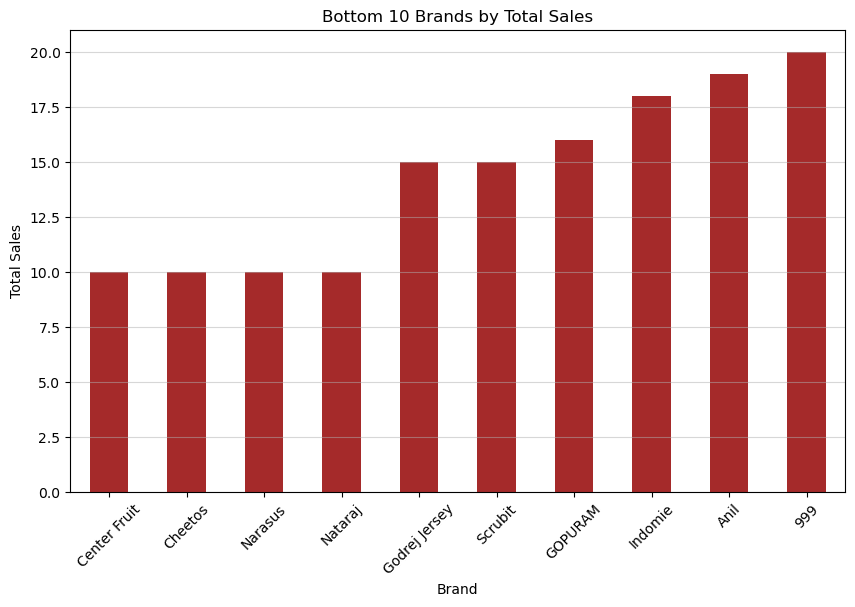

In [35]:
plt.figure(figsize=(10, 6))
bottom_brands.plot(kind='bar', color='brown')
plt.xlabel("Brand")
plt.ylabel("Total Sales")
plt.title("Bottom 10 Brands by Total Sales")
plt.xticks(rotation=45)  # Rotate brand names for better visibility
plt.grid(axis="y", alpha=0.5)
plt.show()

### 5. PRODUCTS

In [36]:
total_cost_of_product = df.groupby('product')['market_price'].sum()
# Grouped by product for total cost

In [37]:
most_costing_products = total_cost_of_product.compute().nlargest(10)

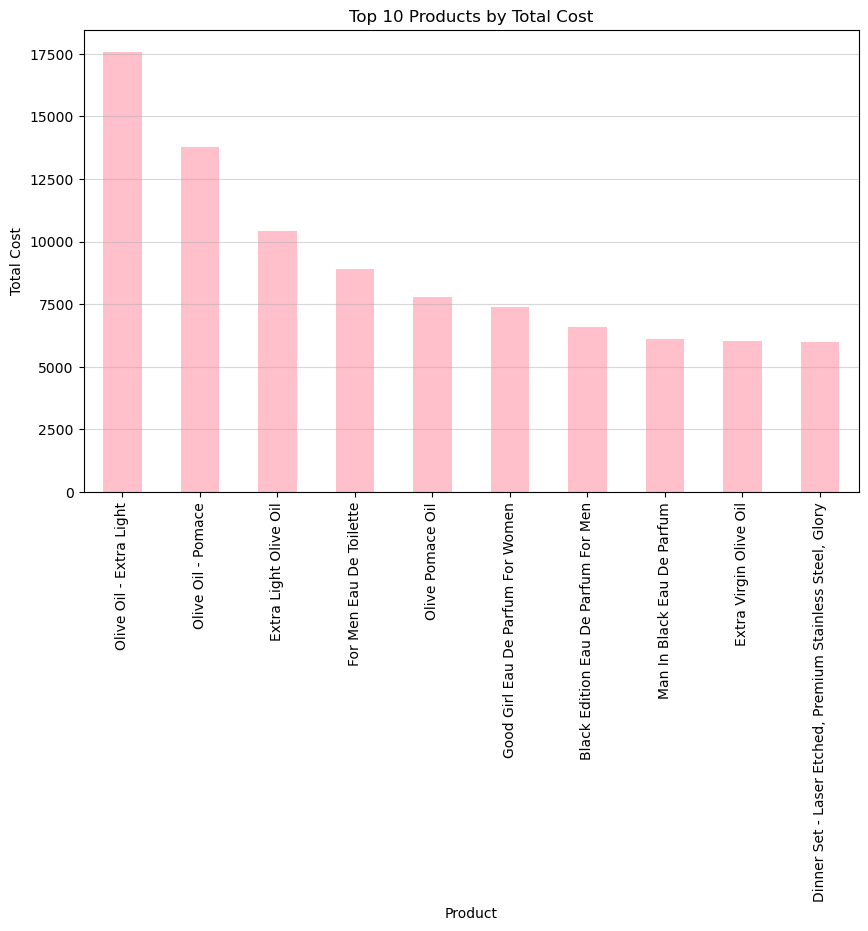

In [38]:
plt.figure(figsize=(10, 6))
most_costing_products.plot(kind='bar', color='pink')
plt.xlabel("Product")
plt.ylabel("Total Cost")
plt.title("Top 10 Products by Total Cost")
plt.xticks(rotation=90)  # Rotate brand names for better visibility
plt.grid(axis="y", alpha=0.5)
plt.show()

In [39]:
least_costing_products = total_cost_of_product.compute().nsmallest(10)

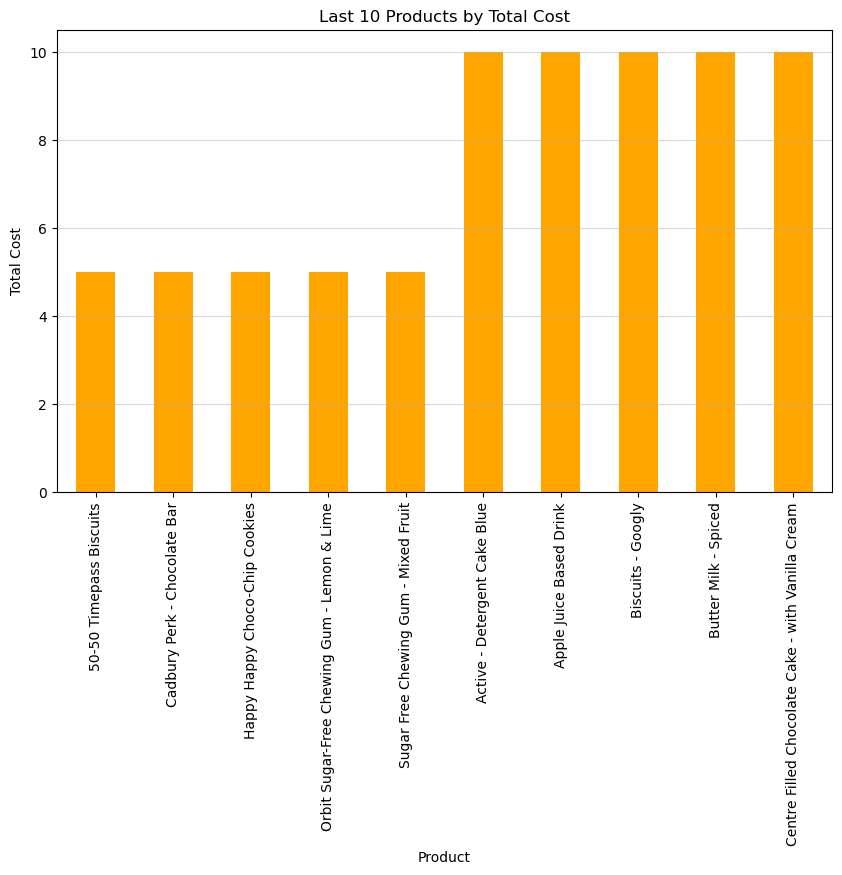

In [40]:
plt.figure(figsize=(10, 6))
least_costing_products.plot(kind='bar', color='orange')
plt.xlabel("Product")
plt.ylabel("Total Cost")
plt.title("Last 10 Products by Total Cost")
plt.xticks(rotation=90)  # Rotate brand names for better visibility
plt.grid(axis="y", alpha=0.5)
plt.show()

## Evaluation

### The observations based on the insights extracted are :
##### a) All the categories have got equal no. of ratings i.e. 5 each.
##### b) Highest rating received is '2' in categories.
##### c) All the sub categories have got ratings of either 4 or 5.
##### d) Majorly the sub categories have received the rating as '5'.
##### e) Skincare has received the highest no. of ratings in the sub category.
##### e) Prestige, followed by Pampers and Cello are the top brands that are sold in the market.
##### f) 999 is the brand with the least sales in the market followed by Anil and Indomie.
##### g) Extra light Olive oil has the highest cost price in the market.
##### h) Cost of butter milk, biscuits and a couple other items is the least in the market.